In [1]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from collections import OrderedDict
from pathlib import Path
from sklearn.model_selection import train_test_split
from MLCode.utils import load_monk_data, np_monk, rescale_bin, plot_NN_TR_TS
from MLCode.NN import NN_HyperParameters
from MLCode.NN_monk import NN_BinClassifier, train_NN_monk
import matplotlib.pyplot as plt

In [2]:
def NN_MONK_solve(monk_n, NN_HP):
    """Solves MONK number `monk_n`, using a NN model
    defined by `NN_HP`.

    After training the model, it plots the relevant statistics.
    """
    df_train = load_monk_data(monk_n)
    df_test = load_monk_data(monk_n, train=False)

    X_train, Y_train = np_monk(df_train, np.float64, np.int32)
    X_test, Y_test = np_monk(df_test, np.float64, np.int32)
    net = NN_BinClassifier(NN_HP)

    stats = train_NN_monk(net, X_train, Y_train, X_test, Y_test, 250)
    tr_errors, val_errors, tr_accuracies, val_accuracies, loss = stats

    plot_NN_TR_TS(tr_errors, val_errors, 'MEE')
    plot_NN_TR_TS(tr_accuracies, val_accuracies, 'accuracy')
    plt.show()

    print('Test accuracy achieved:', max(val_accuracies))


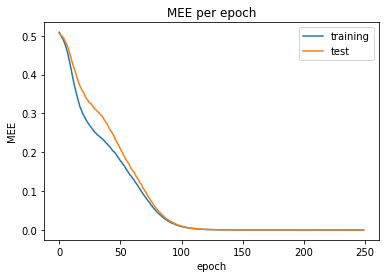

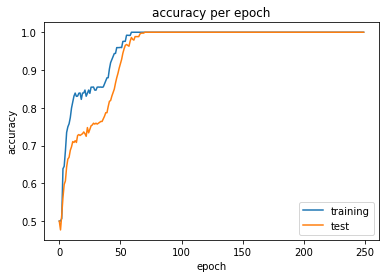

Test accuracy achieved: 1.0


In [4]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    stop_after=30,
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=25,
)

NN_MONK_solve(1, NN_HP)

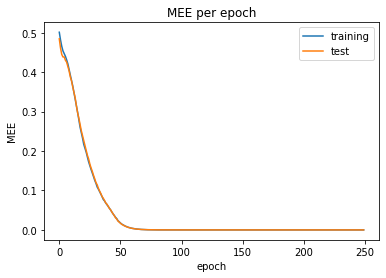

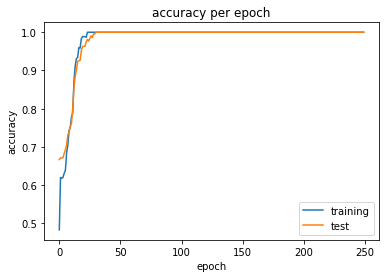

Test accuracy achieved: 1.0


In [4]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    stop_after=30,
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=25,
)

NN_MONK_solve(2, NN_HP)

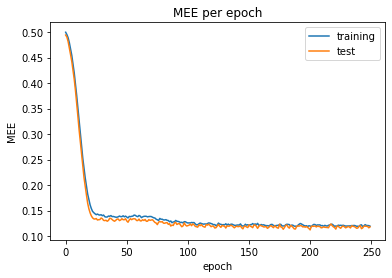

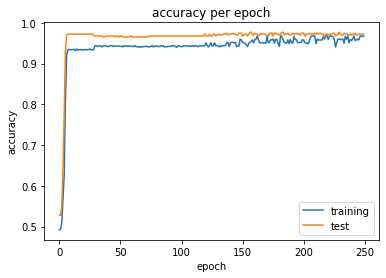

Test accuracy achieved: 0.9768518805503845


In [5]:
# MONK 1

NN_HP = NN_HyperParameters(
    [17, 4],
    stop_after=30,
    lr=0.01,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0.003,
    mb_size=25,
)

NN_MONK_solve(3, NN_HP)